<a href="https://colab.research.google.com/github/LisaCh24/astrodata/blob/main/Exoplant_Transit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #lets us do math
import matplotlib.pyplot as plt #allows us to plot data
import astropy.units as u #units needed for calculations
import astropy.constants as ac #constants needed for calculations

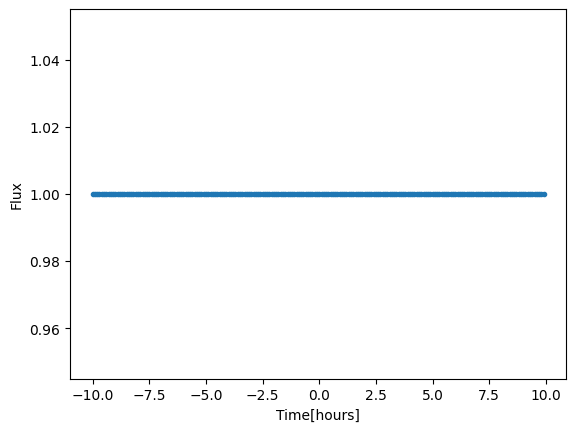

In [2]:
time_arr = np.arange(-10,10,0.1) * u.hour #window
flux_arr = np.zeros(np.shape(time_arr)) + 1.0 #flux line will start at 100%
plt.plot (time_arr, flux_arr, linestyle="--", marker= ".") #plot the time and flux
plt.xlabel ("Time[hours]") #label the x axis as time
plt.ylabel ("Flux") #label the y axis as flux
plt.show () #show the graph

In [3]:
tau = 2.0 * u.hour #transit
t_0 = 1.0 * u.hour #duration
time_start = t_0 - tau/2 #beginning of transit
time_end = t_0 + tau/2 #end of transit
print (time_start, time_end) #show the times below

0.0 h 2.0 h


In [4]:
for i in range(len(time_arr)): #for the index value in the time
  if i < 10: #if index is less than 10
    print ("index =", i, "value =", time_arr[i]) #then print the value below

index = 0 value = -10.0 h
index = 1 value = -9.9 h
index = 2 value = -9.8 h
index = 3 value = -9.700000000000001 h
index = 4 value = -9.600000000000001 h
index = 5 value = -9.500000000000002 h
index = 6 value = -9.400000000000002 h
index = 7 value = -9.300000000000002 h
index = 8 value = -9.200000000000003 h
index = 9 value = -9.100000000000003 h


In [5]:
ind = np.where((time_arr>=time_start) & (time_arr<=time_end)) # #separate the time into 0.1 hour segments
print(time_arr[ind]) #show this below

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ] h


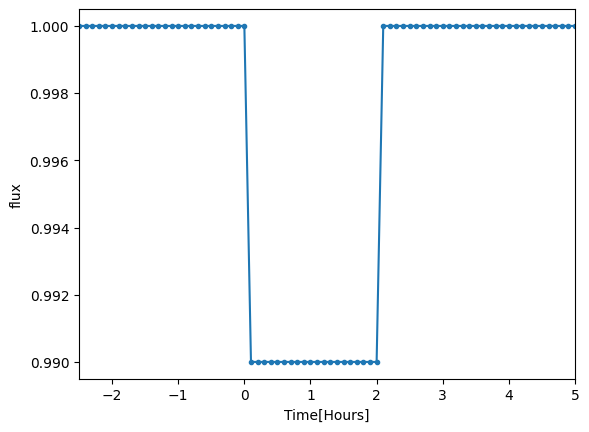

In [6]:
delta = 0.01 #the delta is 0.01 (1% drop)
flux_arr[ind] = 1.0 - delta #1% drop from the original 100% flux
plt.plot(time_arr, flux_arr, linestyle="-", marker=".") #plot the time and flux
plt.xlabel ("Time[Hours]") #label the x axis as time in hours
plt.ylabel ("flux") #label the y axis as flux
plt.xlim (-2.5, 5.0) #limit the x axis to capture the event
plt.show() #show the graph

In [7]:
def generate_transit_lightcurve (time_arr, t_0, tau, delta): #generate a light curve to use later
  flux_arr = np.zeros (np.shape (time_arr)) +1.0 #starts at 100%
  time_start = t_0 - tau / 2 #starts at duration - half of transit time
  time_end = t_0 + tau / 2 #time ends at duration + half of transit time
  ind = np.where((time_arr >= time_start) & (time_arr <=time_end)) #between start and end
  flux_arr[ind] = 1.0 - delta #flux drops by delta
  return flux_arr #shows the flux

In [8]:
time_arr = np.arange(-10, 10, 0.1) * u.hour #the same window from previous code
tau = 4.0 * u.hour #length of event
t_0 = 2.0 * u.hour #middle time
delta = 0.99 #how much light dropped (by 99%)

flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta) #flux is the light curve we just described above

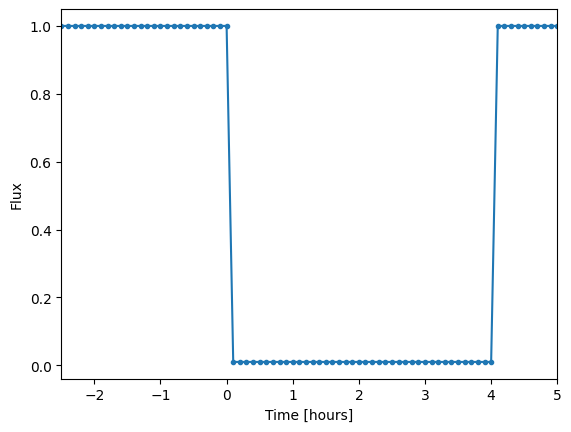

In [9]:
plt.plot(time_arr, flux_arr, linestyle="-", marker=".") #plot the time and flux
plt.xlabel("Time [hours]") #label the x axis as time in hours
plt.ylabel("Flux") #label the y axis as flux
plt.xlim(-2.5, 5.0) #limit the x axis (from -2.5 to 5 hours)
# plt.ylim(0, 0.02)
plt.show () #show the graph

In [10]:
from google.colab import files #import a file
uploaded = files.upload() #file uploaded

Saving gj436b.tbl to gj436b.tbl


In [11]:
import astropy.io.ascii #package reads the data from imported file
dat = astropy.io.ascii.read("gj436b.tbl") #name the data "dat"

In [12]:
dat[0:3] #get the first three lines

set,HJD,Relative_Flux
int64,float64,float64
0,2454280.6858131,0.99858714
0,2454280.6861306,0.99893544
0,2454280.6864482,1.0005495


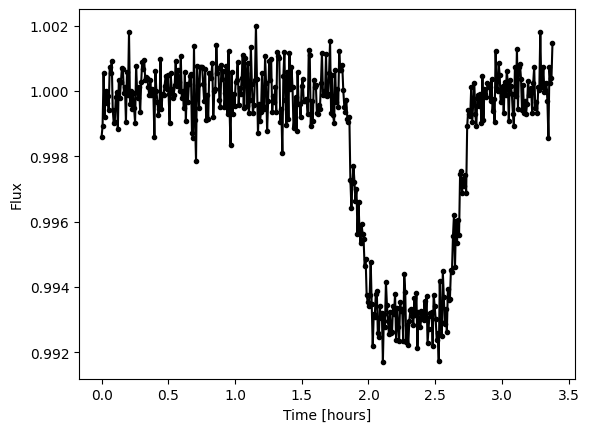

In [19]:
time_obs = dat["HJD"] #get time data from file
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour #convert the time into hours
flux_obs = dat["Relative_Flux"] #get flux data from file
plt.plot(time_obs, flux_obs, marker=".", color="black") #plot time and flux
plt.xlabel("Time [hours]") #label x axis
plt.ylabel("Flux") #label y axis

plt.show() #show the graph


In [20]:
t_0 = 2.3 * u.hour #the middle of event happens around this time
tau = 0.8 * u.hour #lasts abot this time
delta = 0.008 #flux dropped by 0.008
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta) #create light curve for this data

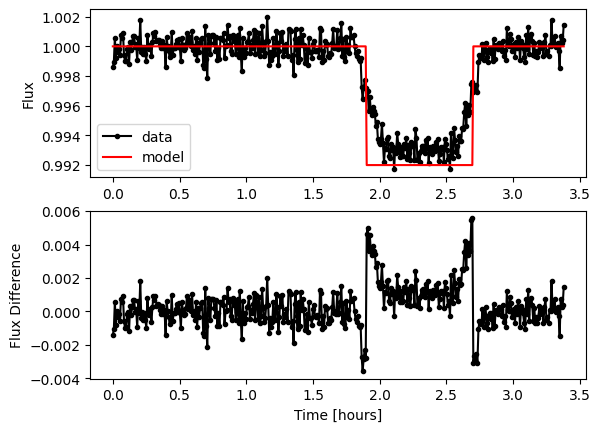

In [22]:

plt.subplot(2, 1, 1) #1 of 2 plots

plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") #plot the light curve from data
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") #plot curve model
# plt.xlabel("Time [hours]")
plt.ylabel("Flux") #label y axis
plt.legend()

plt.subplot(2, 1, 2) #2 of 2 plots

plt.plot(time_obs, flux_obs - flux_model, marker=".", color="black") #plot difference of the two curves
plt.xlabel("Time [hours]") #label x axis
plt.ylabel("Flux Difference") #label y axis

plt.show() #show the graphs

In [16]:

# Now we find the error of the data so that we can calculate reduce Chi2
ind = np.where(time_obs < 1.5 * u.hour) # where there is not transit but has fluctuation
error = np.std(flux_obs[ind]) #this is the error

degree_of_freedom = len(time_obs) - 3 #3 degrees of freedom because no restraints
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom #plug into chi square formula
print(reduced_Chi2) #print the chi square

3.0829936013653345


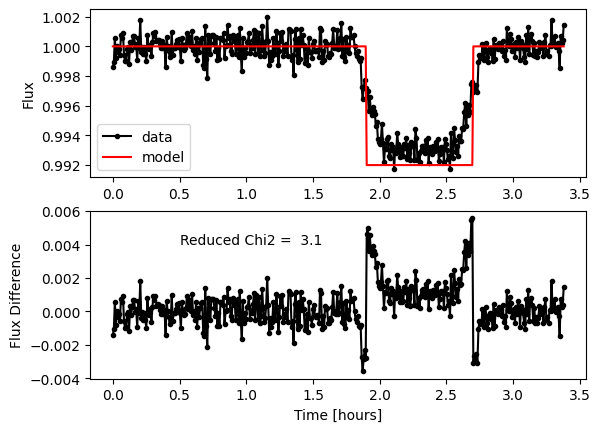

In [25]:

plt.subplot(2, 1, 1) #1 of 2 plots

plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") #plot the light curve from data
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") #plot curve model
# plt.xlabel("Time [hours]")
plt.ylabel("Flux") #label y axis
plt.legend()

plt.subplot(2, 1, 2) #2 of 2 plots

plt.plot(time_obs, flux_obs - flux_model, marker=".", color="black") #print difference of data and model
plt.xlabel("Time [hours]") #label x axis
plt.ylabel("Flux Difference") #label y axis

degree_of_freedom = len(time_obs) - 3 #3 degrees of freedom because no restraints
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom #plug into chi square formula
plt.annotate("Reduced Chi2 = {0:4.1f}".format(reduced_Chi2), xy=[0.5, 0.004]) #annotate plot with chi square value

plt.show() #show the graphs